In [1]:
# Compare the tSNE results between tree and non-tree
# The tree structure is composed of 5 nodes, the extracted codes of which are saved in the folder
# feature-for-paper.

In [2]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.setrecursionlimit(1000000)

In [3]:
import utils

In [4]:
plt.rcParams["figure.figsize"] = [5.0, 5.0]

In [5]:
import os
import pickle
folder = "./features-for-paper/"

# load features 

In [6]:
# l1
fname = "code_l1.pkl"
with open(os.path.join(folder,fname), 'rb') as fp:
    dict_l1 = pickle.load(fp)
# Extract FR0s
code_l1 = dict_l1["code"]
label_l1 = dict_l1["label"]
idx_fr0 = np.where(label_l1 == 0)[0]
code_fr0 = code_l1[idx_fr0,:]
label_fr0 = label_l1[idx_fr0] + 1

```python
# l2 pending...
fname = "code_l2.pkl"
with open(os.path.join(folder,fname), 'rb') as fp:
    dict_l2 = pickle.load(fp)
# Extract FR0s
code_l2 = dict_l2["code"]
label_l2 = dict_l2["label"]
# fr1
idx_fr1 = np.where(label_l2 == 0)[0]
code_fr1 = code_l2[idx_fr1,:]
label_fr1 = label_l2[idx_fr1]
# fr2
idx_fr2 = np.where(label_l2 == 1)[0]
code_fr2 = code_l2[idx_fr2,:]
label_fr2 = label_l2[idx_fr2]
```

In [7]:
# l3l 
fname = "code_l3l.pkl"
with open(os.path.join(folder,fname), 'rb') as fp:
    dict_l3l = pickle.load(fp)
# Extract FR0s
code_l3l = dict_l3l["code"]
label_l3l = dict_l3l["label"]
# fr1
idx_fr1 = np.where(label_l3l == 0)[0]
code_fr1 = code_l3l[idx_fr1,:]
label_fr1 = label_l3l[idx_fr1] + 2
# bt
idx_bt = np.where(label_l3l == 1)[0]
code_bt = code_l3l[idx_bt,:]
label_bt = label_l3l[idx_bt] * 4

In [8]:
# l3r 
fname = "code_l3r.pkl"
with open(os.path.join(folder,fname), 'rb') as fp:
    dict_l3r = pickle.load(fp)
# Extract FR0s
code_l3r = dict_l3r["code"]
label_l3r = dict_l3r["label"]
# fr2
idx_fr2 = np.where(label_l3r == 0)[0]
code_fr2 = code_l3r[idx_fr2,:]
label_fr2 = label_l3r[idx_fr2] + 3
# A
# idx_a = np.where(label_l3r == 1)[0]
# code_a = code_l3r[idx_a,:]
# label_a = label_l3r[idx_a] * 5

In [9]:
# l4 
fname = "code_l4.pkl"
with open(os.path.join(folder,fname), 'rb') as fp:
    dict_l4 = pickle.load(fp)
# Extract FR0s
code_l4 = dict_l4["code"]
label_l4 = dict_l4["label"]
# X
idx_x = np.where(label_l4 == 0)[0]
code_x = code_l4[idx_x,:]
label_x = label_l4[idx_x] + 5
# R
idx_r = np.where(label_l4 == 1)[0]
code_r = code_l4[idx_r,:]
label_r = label_l4[idx_r] * 6

# Combine and do tSNE

In [28]:
idx = np.random.permutation(1900)
numsamples = 400
codes = np.vstack([code_fr0[idx[0:numsamples],:], code_fr1[idx[0:numsamples],:], code_fr2[idx[0:numsamples],:], 
                   code_bt[idx[0:numsamples],:], code_x[idx[0:numsamples],:], code_r[idx[0:numsamples],:]])
labels = np.hstack([label_fr0[idx[0:numsamples]], label_fr1[idx[0:numsamples]], label_fr2[idx[0:numsamples]], 
                    label_bt[idx[0:numsamples]], label_x[idx[0:numsamples]], label_r[idx[0:numsamples]]])

In [29]:
label_r.shape

(2200,)

In [30]:
# idx = np.random.permutation(len(labels))
# numsample = 4000
# code_tsne = codes[idx[0:numsample],:]
# label_tsne = labels[idx[0:numsample]]
code_tsne = codes
label_tsne = labels

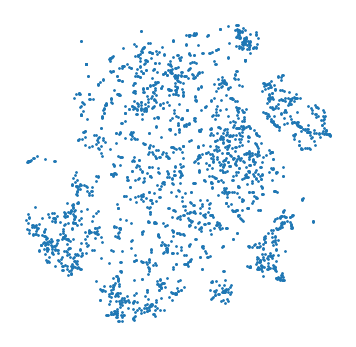

In [31]:
plt.rcParams["figure.figsize"] = [6.0, 6.0]
X_tsne = utils.down_dimension(code=code_tsne, method='tSNE', params={'n_components': 2, 'learning_rate': 100})
# X_tsne = TSNE(n_components=4,learning_rate=100).fit_transform(code)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],s=3)
# plt.colorbar()
plt.box("off")
plt.xticks([])
plt.yticks([])
plt.show()

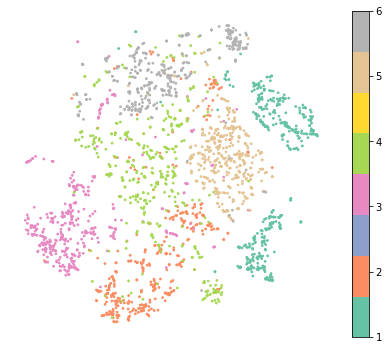

In [32]:
plt.rcParams["figure.figsize"] = [7.2, 6.0]
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=label_tsne, s=3, cmap='Set2')
plt.colorbar()
# plt.title("Feature visualization with t-SNE: tree")
plt.box("off")
plt.xticks([])
plt.yticks([])
plt.savefig("TSNE-tree.png", dpi=300)
# plt.show()

# Trained without tree structure

In [33]:
# load codes
fname = "code_all.pkl"
with open(os.path.join(folder,fname), 'rb') as fp:
    dict_all = pickle.load(fp)
# Extract FR0s
code_all = dict_all["code"]
label_all = dict_all["label"]

In [34]:
idx = np.random.permutation(len(label_all))
numsamples = 2000
code_all_tsne = code_all[idx[0:numsamples],:]
label_all_tsne = label_all[idx[0:numsamples]]

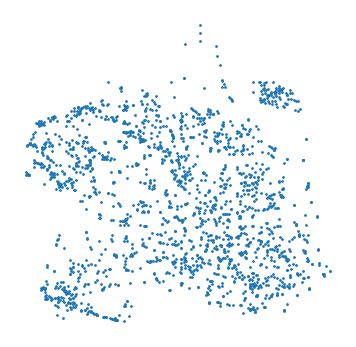

In [35]:
plt.rcParams["figure.figsize"] = [6.0, 6.0]
X_tsne_all = utils.down_dimension(code=code_all_tsne, method='tSNE', params={'n_components': 2, 'learning_rate': 100})
# X_tsne = TSNE(n_components=4,learning_rate=100).fit_transform(code)
plt.scatter(X_tsne_all[:, 0], X_tsne_all[:, 1],s=3)
# plt.colorbar()
plt.box("off")
plt.xticks([])
plt.yticks([])
plt.show()

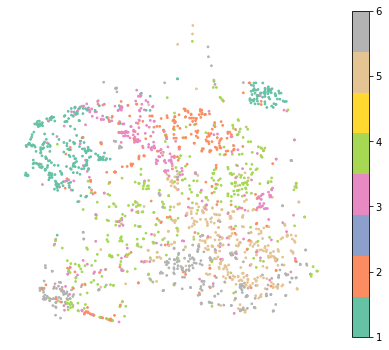

In [36]:
plt.rcParams["figure.figsize"] = [7.2, 6.0]
plt.scatter(X_tsne_all[:, 0], X_tsne_all[:, 1], c=label_all_tsne, s=3, cmap='Set2')
plt.colorbar()
# plt.title("Feature visualization with t-SNE: no-tree")
plt.box("off")
plt.xticks([])
plt.yticks([])
plt.savefig("TSNE-notree.png", dpi=300)
# plt.show()